In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_csv("user_interactions_raw.csv")
df_raw.head()

,event_timestamp,user_id,feature_name,action_type,session_id,session_duration_sec,device_type,user_type
0,2026-01-08 00:24:59.937511,1456,Dashboard,download,28024,511.0,web,new
1,2025-12-30 10:56:59.937511,1356,Export,view,12082,71.0,web,new
2,2025-11-13 05:32:59.937511,3298,dashboard,download,45713,869.0,mobile,returning
3,2025-11-11 09:45:59.937511,4108,NaN,click,37696,NaN,web,new
4,2025-12-11 10:52:59.937511,1418,Dashboard,view,16338,NaN,mobile,new


In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52449 entries, 0 to 52448
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   event_timestamp       52449 non-null  object 
 1   user_id               52449 non-null  int64  
 2   feature_name          44987 non-null  object 
 3   action_type           52449 non-null  object 
 4   session_id            52449 non-null  int64  
 5   session_duration_sec  26230 non-null  float64
 6   device_type           52449 non-null  object 
 7   user_type             52449 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [3]:
df_raw.isna().sum()

event_timestamp             0
user_id                     0
feature_name             7462
action_type                 0
session_id                  0
session_duration_sec    26219
device_type                 0
user_type                   0
dtype: int64

In [4]:
df_raw.duplicated().sum()

2449

In [5]:
df_raw['feature_name'].value_counts(dropna=False)

feature_name
KPI Page     7638
Dashboard    7598
Export       7566
dashboard    7469
NaN          7462
Filter       7407
Search       7309
Name: count, dtype: int64

In [6]:
df = df_raw.drop_duplicates().copy()

In [7]:
df['feature_name'] = (
    df['feature_name']
    .str.strip()
    .str.lower()
    .fillna('unknown_feature')
)

In [8]:
median_duration = df['session_duration_sec'].median()
df['session_duration_sec'] = df['session_duration_sec'].fillna(median_duration)

In [9]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

In [10]:
df['event_date'] = df['event_timestamp'].dt.date

In [11]:
df['session_bucket'] = pd.cut(
    df['session_duration_sec'],
    bins=[0,300,900,1800],
    labels=['short','medium','long']
)

In [12]:
df['interaction'] = 1

In [14]:
df.isna().sum()
df.duplicated().sum()
df.head()

,event_timestamp,user_id,feature_name,action_type,session_id,session_duration_sec,device_type,user_type,event_date,session_bucket,interaction
0,2026-01-08 00:24:59.937511,1456,dashboard,download,28024,511.0,web,new,2026-01-08,medium,1
1,2025-12-30 10:56:59.937511,1356,export,view,12082,71.0,web,new,2025-12-30,short,1
2,2025-11-13 05:32:59.937511,3298,dashboard,download,45713,869.0,mobile,returning,2025-11-13,medium,1
3,2025-11-11 09:45:59.937511,4108,unknown_feature,click,37696,903.0,web,new,2025-11-11,long,1
4,2025-12-11 10:52:59.937511,1418,dashboard,view,16338,903.0,mobile,new,2025-12-11,long,1


In [15]:
df.to_csv("user_interactions_clean.csv", index=False)

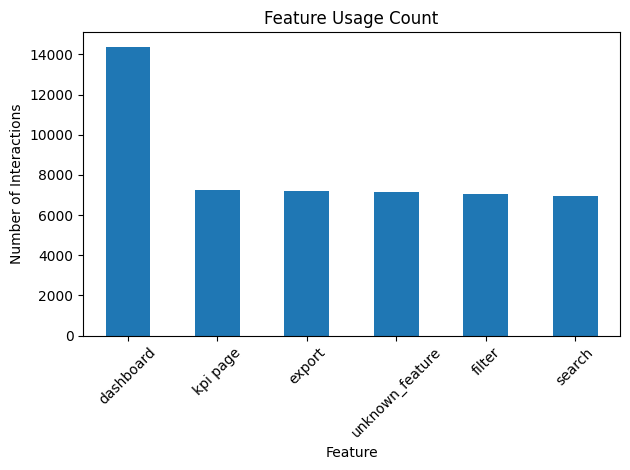

In [17]:
# What features are used the most
feature_usage = (
    df.groupby('feature_name')
    .size()
    .sort_values(ascending=False)
)

plt.figure()
feature_usage.plot(kind='bar')
plt.title("Feature Usage Count")
plt.xlabel("Feature")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

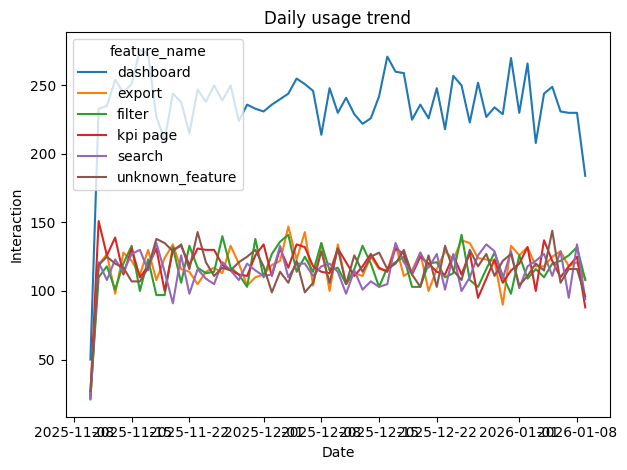

In [19]:
# how does feature usage change over time
daily_usage = (
    df.groupby(['event_date', 'feature_name'])
    .size()
    .unstack(fill_value=0)
)

plt.figure()
daily_usage.plot()
plt.title("Daily usage trend")
plt.xlabel("Date")
plt.ylabel("Interaction")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

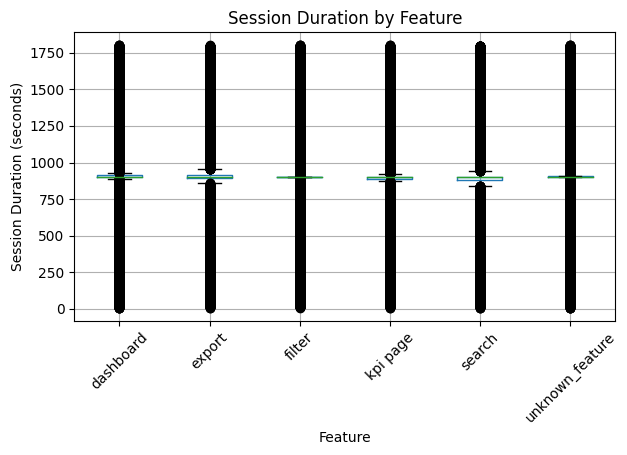

In [20]:
# Which features keep users engaged longer
plt.figure()
df.boxplot(column='session_duration_sec', by='feature_name')
plt.title("Session Duration by Feature")
plt.suptitle("")
plt.xlabel("Feature")
plt.ylabel("Session Duration (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


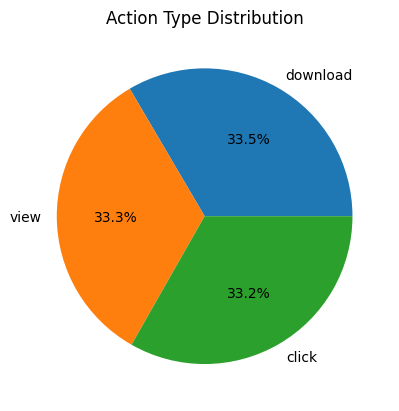

In [21]:
# How users interact with features
action_dist = df['action_type'].value_counts()

plt.figure()
action_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title("Action Type Distribution")
plt.ylabel("")
plt.show()

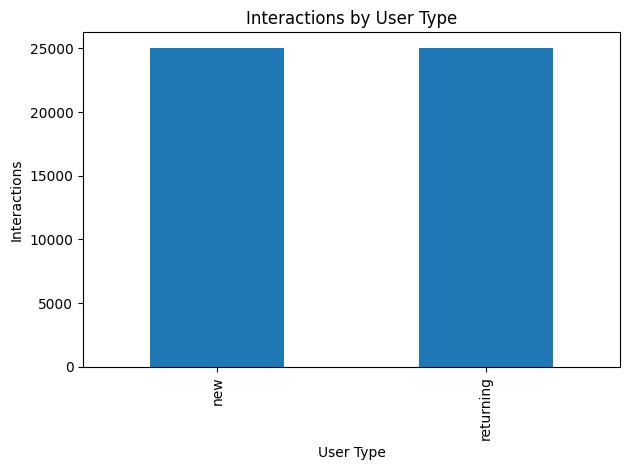

In [22]:
# Do returning users behave differently
user_type_usage = (
    df.groupby('user_type')
      .size()
)

plt.figure()
user_type_usage.plot(kind='bar')
plt.title("Interactions by User Type")
plt.xlabel("User Type")
plt.ylabel("Interactions")
plt.tight_layout()
plt.show()

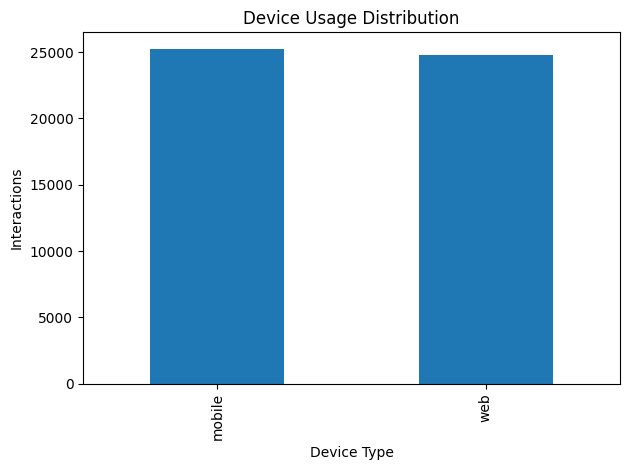

In [23]:
# How users access the application
device_usage = df['device_type'].value_counts()

plt.figure()
device_usage.plot(kind='bar')
plt.title("Device Usage Distribution")
plt.xlabel("Device Type")
plt.ylabel("Interactions")
plt.tight_layout()
plt.show()
